# CNN MNIST

## Loading and preprocessing the data

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools 
import numpy as np

In [16]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [17]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [18]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [19]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


### Implementing a CNN using the TensorFlow Keras API

#### Configuring CNN layers in Keras

 * **Conv2D:** `tf.keras.layers.Conv2D`
   * `filters`
   * `kernel_size`
   * `strides`
   * `padding`
   
   
 * **MaxPool2D:** `tf.keras.layers.MaxPool2D`
   * `pool_size`
   * `strides`
   * `padding`
   
   
 * **Dropout** `tf.keras.layers.Dropout2D`
   * `rate`

### Constructing a CNN in Keras

In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(28,28,1)))

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5), strides=(1, 1), padding='same', 
    data_format='channels_last', name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5), strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, name='pool_2'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=32, name='fc_1', activation='relu'))

model.add(tf.keras.layers.Dropout(rate=0.5))
    
model.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        51264     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 32)                100384    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [23]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
57/57 [==============================] - 1s 21ms/step - loss: 1.7092 - accuracy: 0.4033 - val_loss: 0.7938 - val_accuracy: 0.7950
Epoch 2/20
57/57 [==============================] - 1s 19ms/step - loss: 0.9774 - accuracy: 0.6483 - val_loss: 0.3795 - val_accuracy: 0.9200
Epoch 3/20
57/57 [==============================] - 1s 19ms/step - loss: 0.7483 - accuracy: 0.7394 - val_loss: 0.3175 - val_accuracy: 0.9250
Epoch 4/20
57/57 [==============================] - 1s 19ms/step - loss: 0.6096 - accuracy: 0.7817 - val_loss: 0.1991 - val_accuracy: 0.9600
Epoch 5/20
57/57 [==============================] - 1s 19ms/step - loss: 0.5559 - accuracy: 0.7911 - val_loss: 0.2096 - val_accuracy: 0.9500
Epoch 6/20
57/57 [==============================] - 1s 19ms/step - loss: 0.5320 - accuracy: 0.8072 - val_loss: 0.1932 - val_accuracy: 0.9550
Epoch 7/20
57/57 [==============================] - 1s 19ms/step - loss: 0.5072 - accuracy: 0.8206 - val_loss: 0.1658 - val_accuracy: 0.9450
Epoch 8/20
57

### During training, the train accuracy will be lower than validation accuracy due to dropout.

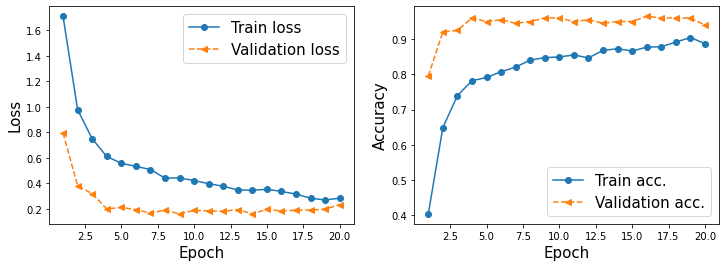

In [25]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [26]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

63/63 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9455

Test Acc. 94.55%


In [27]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 109


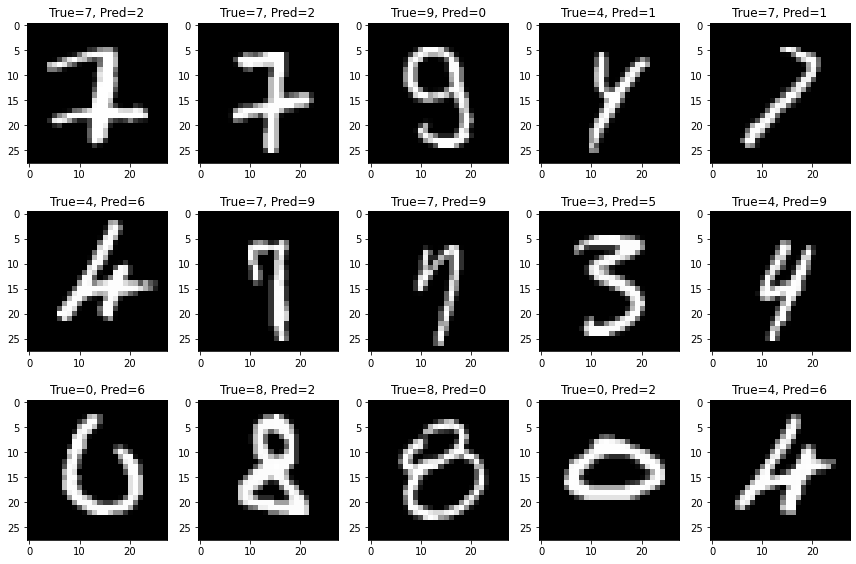

In [28]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()